# Lab 6 - Implement Classification methods to detect heart disease in anonymous patients
*© 2023 Colin Conrad*

We have made so much progress in the past five weeks. In this session, we will dig a bit more deeply into data mining by drawing from our visualization and statistics skills, but most importantly, but exploring _classification_. This technique is one of the common tasks of machine learning, a whole world onto itself. The objective of classification is to train a computer algorithm that can detect a target data feature (in this case, whether or not someone has heart disease) based on the other data features. This task will introduce you to some of the key machine learning concepts as they pertain to information managers. We will draw from a prominent Python library called Scikit-Learn to do this (Pedregosa et al., 2011).

This lab is perhaps the most technically complex of all of the labs (from a theoretical perspective). To help make this simpler, we will explore a relatively simple data set. In fact, it is one of the most commonly explored data sets for this purpose. In many ways, it is also a perfect example of how information managers could help improve researchers' data governance and knowledge discovery processes. If you are interested in exploring this subject further, I am always happy to take on students for directed studies on data mining or machine learning projects.

**This week, we will achieve the following objectives:**
- Explore the factors that indicate heart disease
- Apply a classifier
- Compare and assess the performance of multiple classifiers


# Case: The Heart Disease Dataset
This week's lab is based on the [UCI Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) provided by David Aha. The dataset consists of 303 records of patient data collected in the 1980s, as described by Detrano et al. (1989), Aha & Kibler (n.d.) and Gennari et al. (1989). Though the original records collected comprehensive data from patients, the original fields have been corrupted, and only a limited selection of data remain in the repository (_this_ is why we should teach kids to back up their data... you just never know). The 303 patient records that remain consist of the following data features:

- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: Maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (0 = fixed defect; 1 = normal defect; 2 = reversable defect __Note:__ changed for our class for simplicity)
- target: Heart disease (0 = no, 1 = yes)

This data set has been the subject of hundreds of publications, and all of them (to the best of my knowledge) concern the summarized data similar to that contained in this week's class file.

# Objective 1: Explore the factors that indicate heart disease
This data set is real and interesting. As a data scientist, one of the first things that you would normally do is explore the data set to understand the nuances of the data. Visualization is best suited for this task, hence why we spent so much time on it. Let's start by importing seaborn and exploring the data head.

In [3]:
import pandas as pd # these are the same as Lab 6

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

hd = pd.read_csv('Lab6_data_heart.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,1


In [4]:
len(hd)

303

This data is well and good, though it is a little vague, especially to non-medical professionals. We should consider first changing the names of the columns to something more descriptive. The following code renames the columns sequentially. 

In [5]:
hd.columns = [
    'age', 
    'sex', 
    'chest_pain_experienced', 
    'resting_blood_pressure', 
    'cholesterol', 
    'fasting_blood_sugar', 
    'electrocardiograph',
    'maximum_heart_rate',
    'exercise_induced_angina',
    'st_depression',
    'st_slope',
    'major_vessels',
    'thalassemia',
    'target'
]

In [6]:
men = hd[hd["sex"] == 1]

In [7]:
men

,age,sex,chest_pain_experienced,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardiograph,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,0,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,2,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,2,0


In [8]:
means_men = men.groupby(by="chest_pain_experienced").mean()

In [9]:
means_men

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardiograph,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
chest_pain_experienced,,,,,,,,,,,,,
0,55.105769,1.0,129.557692,243.605769,0.125000,0.451923,138.759615,0.596154,1.393269,1.288462,1.019231,1.519231,0.201923
1,51.031250,1.0,128.593750,241.031250,0.093750,0.656250,162.187500,0.062500,0.234375,1.687500,0.343750,1.218750,0.781250
2,52.538462,1.0,132.057692,231.134615,0.250000,0.596154,158.173077,0.173077,1.015385,1.461538,0.807692,1.326923,0.673077
3,54.315789,1.0,139.473684,235.052632,0.210526,0.315789,157.315789,0.210526,1.352632,1.210526,0.473684,1.315789,0.631579


In [10]:
women = hd[hd["sex"] == 0]

In [11]:
means_women = women.groupby(by="chest_pain_experienced").mean()

In [12]:
means_women

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardiograph,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
chest_pain_experienced,,,,,,,,,,,,,
0,57.256410,0.0,138.589744,267.538462,0.128205,0.538462,145.282051,0.461538,1.356410,1.179487,0.820513,1.282051,0.461538
1,51.944444,0.0,128.055556,251.444444,0.111111,0.555556,162.833333,0.111111,0.461111,1.666667,0.555556,1.000000,0.888889
2,54.971429,0.0,127.885714,261.057143,0.114286,0.600000,151.800000,0.057143,0.474286,1.571429,0.257143,1.057143,0.971429
3,63.250000,0.0,147.500000,247.000000,0.250000,0.750000,149.500000,0.000000,1.575000,1.500000,0.500000,1.000000,1.000000


In [13]:
means = hd.groupby(by="chest_pain_experienced").mean()

In [14]:
means

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardiograph,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
chest_pain_experienced,,,,,,,,,,,,,
0,55.692308,0.727273,132.020979,250.132867,0.125874,0.475524,140.538462,0.559441,1.383217,1.258741,0.965035,1.454545,0.272727
1,51.360000,0.640000,128.400000,244.780000,0.100000,0.620000,162.420000,0.080000,0.316000,1.680000,0.420000,1.140000,0.820000
2,53.517241,0.597701,130.379310,243.172414,0.195402,0.597701,155.609195,0.126437,0.797701,1.505747,0.586207,1.218391,0.793103
3,55.869565,0.826087,140.869565,237.130435,0.217391,0.391304,155.956522,0.173913,1.391304,1.260870,0.478261,1.260870,0.695652


### Visualize the data and understand the indicators
One of the first things we should do is understand our task. As mentioned in the introduction, our goal is to build an algorithm that can predict whether or not a patient has heart disease, based on their health data. As such, the first thing we should do is observe the number of target variables, which are the indicators of whether someone actually has heart disease. We will find that this data consists of 165 records of patients who were diagnosed with heart disease (`target == 1`) and 138 records of patients who did not have heart disease (`target == 0`). 

<AxesSubplot:xlabel='target', ylabel='count'>

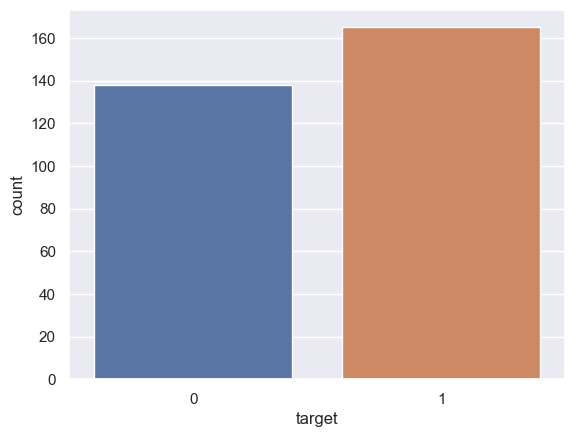

In [15]:
sns.countplot(x="target", data=hd) # countplots are ways of visualizing counts in seaborn

#### Scatterplots
Now that we understand the data, we can explore it. One thing that stood out to me was that we had age and maximum_heart_rate records. It is well known that your heart rate maximum decreases as you age, though people with heart disease also have higher heart rates. A simple way to explore these relationships could be to create a scatter plot that visualizes these three factors. The plot below uses seaborn to achieve this.

<AxesSubplot:xlabel='maximum_heart_rate', ylabel='age'>

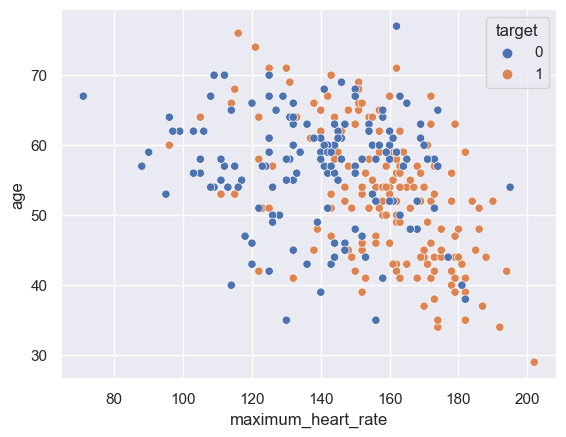

In [16]:
sns.scatterplot(data=hd, x="maximum_heart_rate", y="age", hue="target")

#### Using stats to assess factors
It looks like there may be a relationship between these factors, perhaps most notably, `maximum_heart_rate`. This data is structured in a way that we could easily compare the distribution of our samples, similarly to previous labs. For example, we could observe the Pearson correlation of `maximum_heart_rate` and `age` to determine whether these are correlated. The code below executes this correlation; they are moderately negatively correlated (as expected) with a very low p-value, suggesting that the correlation is significant. 

In [17]:
from scipy import stats
stats.pearsonr(hd["maximum_heart_rate"], hd["age"])

PearsonRResult(statistic=-0.3985219381210675, pvalue=5.628106676351146e-13)

Similarly, we could visualize the `maximum_heart_rate` in light of the target and non-target (diseased and non-disease) records. This will reveal very interesting and suggestive distributions. 

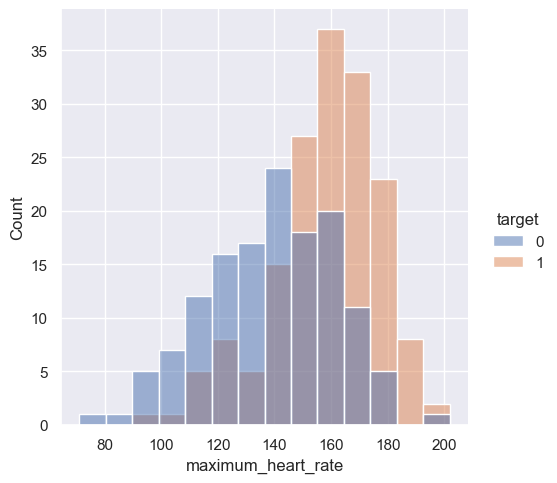

In [18]:
sns.displot(hd, x="maximum_heart_rate", hue="target")

We can similarly run a Pearson correlation on this data, which again suggests a positive correlation between `maximum_heart_rate` and `target`. __Note:__ We could have also run a t-test here to observe whether people with heart disease are likely to have a higher maximum heart rate (which would have indicated ...yes). 

In [19]:
stats.pearsonr(hd["maximum_heart_rate"], hd["target"])

PearsonRResult(statistic=0.42174093381067457, pvalue=1.6973376386561237e-14)

#### Visualizing nominal variables
One of the differences between this data set and what we have seen before is that there are many nominal variables (e.g. variables that are categories). In this case, `thalassemia` indicates one of three states: 0: it has been fixed, 1: the patient has it and 2: that it is "reversable". I am not qualified to speak more about this beyond speculation, though the [literature](https://www.sciencedirect.com/science/article/abs/pii/0002914989905249) suggests that this is a relevant predictor. 

Seaborn's catplot can be used to visualize the counts of these three states. The code below describes the frequencies for each of the target conditions. This brings us to the end of our initial exploration... it will be up to you to continue this!

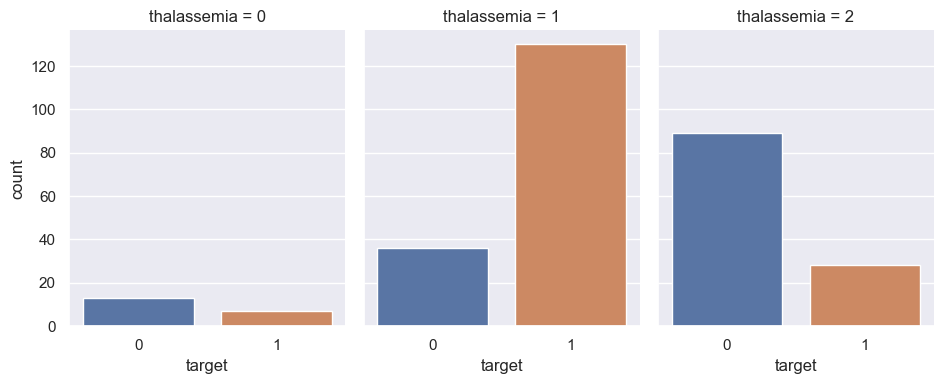

In [20]:
sns.catplot(x="target", col="thalassemia", col_wrap=3,
                data=hd,
                kind="count", height=4, aspect=.8)

### _Challenge Question 1 (1 point)_
Modify and apply one of the plots above to visualize the possible impact of `major_vessels` in predicting heart disease. Do you think this might be a relevant factor for predicting hearth disease? If so (or not) write it in a comment.

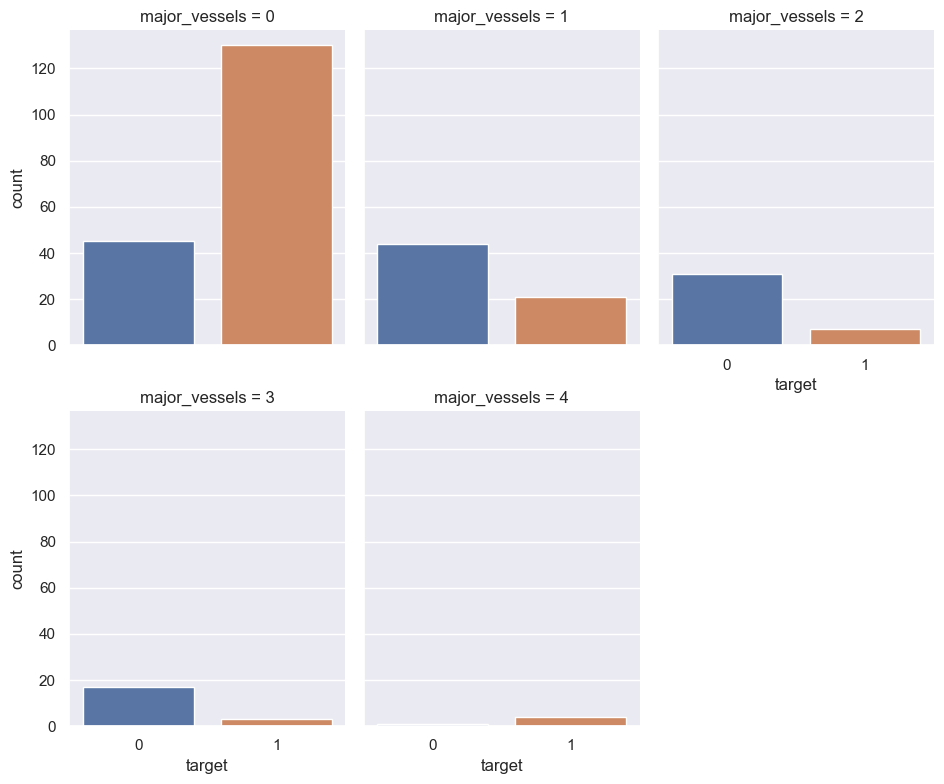

In [21]:
sns.catplot(x="target", col="major_vessels", col_wrap=3,
                data=hd,
                kind="count", height=4, aspect=.8)# insert your code here

In [22]:
#For Major vessels 0, the number of people with heart disease is the highest: 120+
# For major vessels 1, the number of people with hd is the second highest: Around 20
# For major vessels 2, the number of people with hd is the third highest: Around 10
# It can be said, with less working vessels, the likelihood of hd is greater

### Challenge Question 2 (2 points):
For years dietians and food scientists have stated that cholesterol was a really important factor in heart disease, though other studies have pointed to the contrary. Though we are not qualified to tell science otherwise, we can check to see whether the data, at face value, supports this finding. Drawing from the examples above and your expereince from prior labs, do the following:

- Visualize the distribtuions of cholesterol levels for the patient records with heart disease and those who do not have it
- Complete a Pearson correlation of the relationship between cholesterol and heart disease
- Leave a comment somewhere in your answer about whether it is a significant relationship

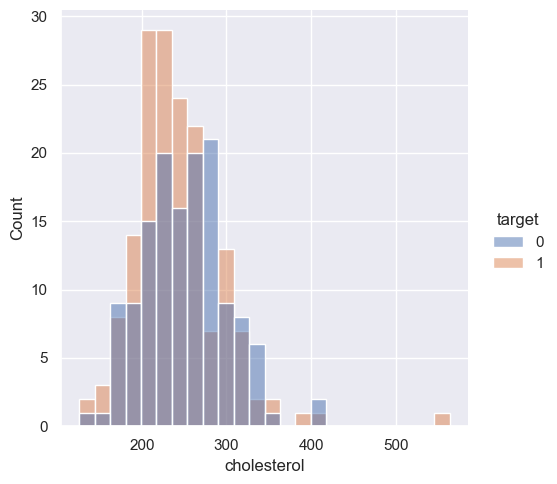

In [23]:
sns.displot(hd, x="cholesterol", hue="target")

In [24]:
stats.pearsonr(hd["cholesterol"], hd["target"])# pearson correlation code here

PearsonRResult(statistic=-0.08523910513756908, pvalue=0.13879032695600968)

In [25]:
# Between the 0-300 Cholesterol range, there are more people with hd than there are without it
# After performing the Pearson Correlation test, there is a weak negative correlation b/w hd and cholesterol

## Objective 2: Apply a classifier
We're now ready to start exploring classification. Algorithms are a series of logical steps used to complete a task. The computer programs that you write in Python are algorithms; your computer interprets these and executes them. However, when it comes to larger or non-obvious data sets, it is impossible to explicitly tell your computer what to do. 

Fortunately, we have machine learning. The goal of machine learning is to create algorithms that accomplish tasks without explicitly programed (Grimson, 2017). To do this, machine learning uses a special set of "machine learning algorithms" to _fit_ to a set of data. The created algorithm can then (in the case of classification) classify new instances or data that was not part of the original set.

To demonstrate classification, we will complete a very simple task. We will use an algorithm called _RandomForest_ to _fit_ to part of our data set (around two thirds). The result will be a algorithm that can tell whether a patient has heart disease. We will then test its performance on the remaining third of the data.

To accomplish this task, we will draw from Scikit-Learn, one of Python's most prominent libraries.

#### Random Forest (Decision trees)
The [Random Forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is part of an algorithm family called decision trees. This algorithm might be fairly familiar to you; the goal of Random Forest is to create a series of decisions similarly to a flow chart. The algorithm essetnailly observes the data and determines a series of rules that are best suited to classifying the data based on the information gained by the decision tree. When we specify a Random Forest classifier, we can specify the number of rules that it looks for by adjusting the `n_estimators` variable, among others.

#### Load the classifier
The first thing that we will need to do is load the classifier. We can do this by loading Scikit-Learn's `RandomForestClassifier` object from its `ensamble` library. We will save the classifier as `clf`.

In [46]:
from sklearn.ensemble import RandomForestClassifier # import sklearn

clf = RandomForestClassifier(n_estimators=10, random_state=0) # save the random forest classifier as clf

#### Resample the data
Currently, our data set is structured such that the records that were positive for heart disease consist of the first 165 rows,  while those that are negative occupied the remaining. This is unfriendly to machine learning. If we are going to train our algorithm on a portion of the data, it is important that this is a random sample. We should thus randomize our data. The line below saves a new data frame called `hdr` (heart disease random) that is a randomized version of our old frame. 

In [47]:
hdr = hd.sample(frac=1) # save a randomized data frame

We can now divide the data. We will take the first 150 records from `hdr` for training the algorithm and the remaining 153 for testing. __Note__ that this is a simple way of selecting test and training data and is used for teaching purposes. There are other ways of resampling data which might be better suited for this task.

In [48]:
train = hdr[:150] # take the first 150 records as train
test = hdr[150:] # take the ramining records as test

print("Train: " + str(len(train)) + " Test: " + str(len(test)))

Train: 150 Test: 153


#### Train the classifier
We are now ready to train the classifier by _fitting_ it to the data. Scikit-Learn's `fit()` method takes two inputs: the data that you wish to classify and labels of the data being classified. This part is a little confusing, but is done this was for a very good reason. It is important to separate the labels from the observed training data because the labels are what we want the algorithm to predict. If we included the labels with the training data, the Random Forest would detect the label as the best feature to ... predict the labels.

The code below creates a dataframe called `training_observed` consisting of all of the training data _other_ than the labels and a list consisting of the `target` column data called `training_labels`. We then call RandomForest's `fit()` to the data. We now have a trained algorithm! 

In [49]:
training_observed = train.drop('target', 1) # training data without target labels
training_labels = train['target'] # the target column as labels


/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_4768/3413370699.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training_observed = train.drop('target', 1) # training data without target labels


In [1]:
training_observed

NameError: name 'training_observed' is not defined

In [51]:
training_labels

143    1
36     1
177    0
103    1
296    0
      ..
284    0
139    1
90     1
210    0
181    0
Name: target, Length: 150, dtype: int64

In [52]:
clf.fit(training_observed, training_labels) # fit the training data and the labels to create a classifier called clf

RandomForestClassifier(n_estimators=10, random_state=0)

#### Create predictions
RandomForest is now ready for action. We can test the algorithm's performance on the remaining 1/3 of the data that we saved earlier. The code below similarly separates the labels out of the `test` data. Using this, we can create predictions. The code below separates the data as before, but also uses the data to create predictions, which is saved in `preds`. You can see the predictions that the algorithm made below.

In [53]:
test_observed = test.drop('target', 1) # test data without labels

/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_4768/2484390331.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_observed = test.drop('target', 1) # test data without labels


In [54]:
test_observed

,age,sex,chest_pain_experienced,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardiograph,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia
8,52,1,2,172,199,1,1,162,0,0.5,2,0,2
130,54,0,2,160,201,0,1,163,0,0.0,2,1,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,2
52,62,1,2,130,231,0,1,146,0,1.8,1,3,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,55,1,0,140,217,0,1,111,1,5.6,0,0,2
252,62,0,0,138,294,1,1,106,0,1.9,1,3,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,1


In [55]:
preds = clf.predict(test_observed) # ask the classifier (clf) to predict
preds # show the predictions

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

#### Test the algorithm's performance
Finally, we are now able to test the performance of the algorithm. There are a few different ways that this can be done. One common way to do this is to measure the algorithm's accuracy (the rate of correct negatives and correct positives vs all observations). 

The code uses Scikit-Learn's `accuracy_score` method to calculate this for us. It takes our predictions and true labels as inputs and then calculates the result. Though I don't know for sure (because the data is randomize) I imagine that your algorithm has an accuracy of somewhere between 70% and 85%. Not too shabby! Congratulations, you have just trained your first machine learning algorithm! 

In [56]:
from sklearn.metrics import accuracy_score # import the accuracy score calculator

test_labels = test['target'] # the test data target labels
accuracy_score(preds, test_labels) # compare the accuracy of the predicted labels and the actual labels

0.7777777777777778

## Challenge Question 3 (2 points)
In the steps mentioned above, we divided the data into train and test datasets; the train data was 1/2 of the overall data and the test data was 1/2 of the data. What happens if we instead take around 80% of the data (the first 240 instances) as training data and 20% of the data (the remaining 63) as test? 

Implement code in the cell below that replicates the results above (Random Forest classifier), but with modified train/test data. Was it more accurate? It might not be the case; it's always good to double-check though!

In [57]:
hdr = hd.sample(frac=1)# insert your code here

In [58]:
train = hdr[:240] # take the first 150 records as train
test = hdr[240:] # take the ramining records as test

print("Train: " + str(len(train)) + " Test: " + str(len(test)))

Train: 240 Test: 63


In [59]:
training_observed = train.drop('target', 1) # training data without target labels
training_labels = train['target'] # the target column as labels

/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_4768/608830790.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training_observed = train.drop('target', 1) # training data without target labels


In [60]:
training_observed

,age,sex,chest_pain_experienced,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardiograph,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia
73,51,1,0,140,261,0,0,186,1,0.0,2,0,1
263,63,0,0,108,269,0,1,169,1,1.8,1,2,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,1
261,52,1,0,112,230,0,1,160,0,0.0,2,1,1
207,60,0,0,150,258,0,0,157,0,2.6,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,59,1,1,140,221,0,1,164,1,0.0,2,0,1
298,57,0,0,140,241,0,1,123,1,0.2,1,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,2
130,54,0,2,160,201,0,1,163,0,0.0,2,1,1


In [61]:
training_labels

73     1
263    0
123    1
261    0
207    0
      ..
77     1
298    0
202    0
130    1
28     1
Name: target, Length: 240, dtype: int64

In [62]:
clf.fit(training_observed, training_labels) # fit the training data and the labels to create a classifier called clf

RandomForestClassifier(n_estimators=10, random_state=0)

In [63]:
test_observed = test.drop('target', 1) # test data without labels
test_observed

/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_4768/3043226767.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_observed = test.drop('target', 1) # test data without labels


,age,sex,chest_pain_experienced,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardiograph,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia
146,44,0,2,118,242,0,1,149,0,0.3,1,1,1
181,65,0,0,150,225,0,0,114,0,1.0,1,3,2
175,40,1,0,110,167,0,0,114,1,2.0,1,0,2
290,61,1,0,148,203,0,1,161,0,0.0,2,1,2
84,42,0,0,102,265,0,0,122,0,0.6,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,35,0,0,138,183,0,1,182,0,1.4,2,0,1
132,42,1,1,120,295,0,1,162,0,0.0,2,0,1
224,54,1,0,110,239,0,1,126,1,2.8,1,1,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,1


In [64]:
preds = clf.predict(test_observed) # ask the classifier (clf) to predict
preds # show the predictions

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [65]:
from sklearn.metrics import accuracy_score # import the accuracy score calculator

test_labels = test['target'] # the test data target labels
accuracy_score(preds, test_labels) # compare the accuracy of the predicted labels and the actual labels

0.8253968253968254

In [66]:
# With a 50/50 Split b/w Training and Test Data, there was an accuracy of 77% 
# With a 80/20 Split b/w Training and Test Data, there was an accuracy of 82%
# In this particular instance, the 80/20 split seems to yield greater accruacy

# Objective 3: Apply and compare multiple classifiers
Though we have one working classifier, it's also important to test other classifiers. Though the decision tree works well in this context, other classifiers might also work well or better. There is no perfect classifer for all context; some classifiers will be a better fit for different data in different contexts. We should try a few techniques and compare their results before calling it a day. Before we get started, lets start by returning to the original data that we had (50-50 split) so that we can assess the algorithms consistently.

In [67]:
train = hdr[:150] # train is the first 150
test = hdr[150:] # test is the last 150

training_observed = train.drop('target', 1) # prepare training data by removing labels
training_labels = train['target']

test_observed = test.drop('target', 1) # prepare test data by removing labels
test_labels = test['target']

/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_4768/175165340.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  training_observed = train.drop('target', 1) # prepare training data by removing labels
/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_4768/175165340.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_observed = test.drop('target', 1) # prepare test data by removing labels


#### Support Vector Machines (SVM)
One popular technique is called _support vector machines_. Unlike decision trees, it's not that straight forward how these work "under the hood". This classifier reduces the data to a simpler form, fits a simple algorithm to it, and then expands that algorithm to the multidimensional data that we have. Don't worry too much about the details; if you are interested, you can learn more in [scikit-learn's SVM documentation](https://scikit-learn.org/stable/modules/svm.html). 

This doesn't stop us from trying it though. The code below implements the SVM classifier. Try running it and see what happens.

In [68]:
from sklearn import svm # import SVM
clf = svm.SVC(gamma='scale') # save clf as the new SVM classifier

clf.fit(training_observed, training_labels) # fit the SVM classifier
preds = clf.predict(test_observed) # predict the results
preds


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [69]:
accuracy_score(preds, test_labels) # display the accuracy

0.6078431372549019

Chances are that your accuracy will not be very good, around 60-65%. This is because we did not select a good kernel for this task. By default, SVM uses a kernel called `radial basis function` which is good for some types of normalized data. When using SVM, it's usually a good idea to also try the `linear` kernel, which is implemented in the code below.

In [70]:
from sklearn import svm # as before
clf = svm.SVC(gamma='scale', kernel="linear") # note that we have the option to change the kernel to 'linear' here

clf.fit(training_observed, training_labels) # as before
preds = clf.predict(test_observed)
preds

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [71]:
accuracy_score(preds, test_labels)

0.8300653594771242

#### Naive Bayes
A third technique we can try is called Naive Bayes. This is a probabilistic classifier based on [Bayes Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem). It is primarily used in text analysis, but can be used in our context as well. Let's train this classifier using the same code as before. You will probably end up with good results using Naive Bayes.

In [72]:
from sklearn.naive_bayes import GaussianNB # import GaussianNB
clf = GaussianNB() # specify the NB classifier

clf.fit(training_observed, training_labels)
preds = clf.predict(test_observed)
preds

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [73]:
accuracy_score(preds, test_labels)

0.803921568627451

Finally, it is worth mentioning that we can also dig more deeply into an algorithm's performance. For example, we could observe the _Confusion Matrix_ which is a way of visualizing exactly how the results were classified. In a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) each row represents an instance of the predicted class, while each column represents the actual class. By visualizing the results this way, we can get a sense of exactly how the classification performed.

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(preds, test_labels) #shows the confusion matrix

array([[49, 13],
       [17, 74]])

Here's how to interpret the confusion matrix:
- The values in the top left of the matrix were classified as "no heart disease" and indeed had no heart disease
- The values in the top right of the matrix were classified as "no heart disease" but had heart disease
- The values in the bottom right of the matrix were classified as "has heart disease" and indeed had heart disease
- The values in the bottom left of the matrix were classified as "no heart disease" but had heart disease

This confusion matrix suggests that our Naive Bayes algorithm had a bit of trouble classifying people as "no heart disease" when they actually did. For more information about how to interpret these results from the perspective of statistics, read through the Wikipedia page on the concepts of `accuracy, precision and recall` as discssed above, or in Grimson's video. We will not expand on these any further here.

## References

Aha, David. Heart disease data set. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.

David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."

Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Grimson, E. (2017). Introduction to machine learning. MIT & YouTube. https://www.youtube.com/watch?v=h0e2HAPTGF4 

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.